In [1]:
from rag_eval import ChunkDataHandler

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow_hub as hub
import tensorflow_text as tftext
import tensorflow as tf
import sys
sys.path.append("..")
import numpy as np

from emb_src.plots import plot_embeddings_2d
from emb_src.chunk_encoder import ChunkEncoder, chunk2query_cosine_similarity

# check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")

2025-06-23 14:41:49.155530: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 14:41:49.178368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-23 14:41:49.201806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-23 14:41:49.208237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-23 14:41:49.228683: I tensorflow/core/platform/cpu_feature_guar

GPU is available.


I0000 00:00:1750682512.891834  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682512.963222  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682512.963311  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
chunk_encoder = ChunkEncoder()
docs_names = chunk_encoder.get_doc_names()

I0000 00:00:1750682513.045902  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682513.046138  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682513.046219  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682513.369839  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1750682513.369976  161935 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-23

In [3]:
scores = chunk_encoder.evaluate_similarities(max_docs=50, threshold=0.45)

50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - f1_score: 0.3899 - precision: 0.4659 - recall: 0.3377 - similarity_coverage: 0.1714 - labels_coverage: 0.2230

Evaluation Results:
F1 Score: 0.39
Precision: 0.47
Recall: 0.34
Similarity Coverage: 17.14%
Labels Coverage: 22.30%


In [8]:
tf.config.experimental.get_memory_usage('GPU:0')/1024**2  # in MB

417.831298828125

In [5]:
# max gpu usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [10]:
encodings = chunk_encoder.encode_doc(docs_names[4], return_all=True)

In [11]:
similarity = chunk2query_cosine_similarity(encodings['encoded_chunks'], encodings['encoded_queries'])
print(f"Similarity shape: {similarity.shape}")

Similarity shape: (62, 5)


Text(0.5, 1.0, 'Chunks Labels')

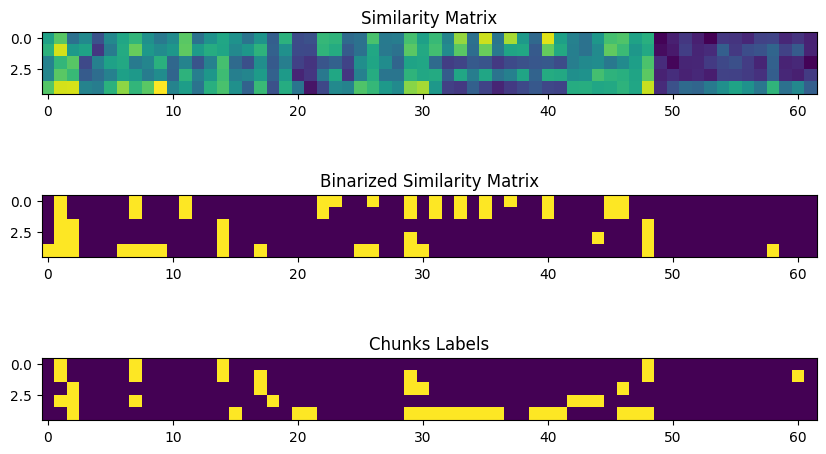

In [14]:
fig, axs = plt.subplots(3,1, figsize=(10,6))

axs[0].imshow(similarity.numpy().T)
axs[0].set_title('Similarity Matrix')

axs[1].imshow(similarity.numpy().T>0.45)
axs[1].set_title('Binarized Similarity Matrix')

axs[2].imshow(encodings['chunks_labels'].numpy().T)
axs[2].set_title('Chunks Labels')

In [15]:
print("Queries:")
for i,query in enumerate(encodings['queries']):
    print(f"[{i+1}] {query}")

Queries:
[1] What is Federated SAM (FedSAM)?
[2] What is Federated SAM with Medical SAM Adapter (FedMSA)?
[3] How does FedFMS maintain privacy while achieving comparable performance to centralized training?
[4] What are the communication and training efficiency benefits of FedMSA?
[5] Compare the performance of FedFMS with centralized training methods in medical image segmentation.


In [20]:
for chunk in encodings['chunks'][5:10]:
    for line in chunk.split('\n'):
        print(line)
    print('---')

large models allows for the distribution of computational requirements [19].
Todate,deployingfoundationmodelsformedicalimageswithinthefederated
learning framework is rare. There are two main issues that remain unexplored:
First, can foundation models trained based on federated learning harness the
powerful capabilities of foundation models, and maintain performance compara-
ble to those trained based on centralized training when facing Non-Independent
and Identically Distributed (Non-IID) datasets? Second, the federated learning
---
of foundation models requires significant communication resources and training
costs, is there a more efficient method for its federated learning training?
To address the above issues, we have collected a large number of real multi-
center medical datasets and developed Federated Foundation models for Medical
image Segmentation (FedFMS) to investigate both its performance of segmen-
tationandtrainingefficiency.FedFMSincludestwofederatedfoundationmodels,
the

In [16]:
for chunk in chunks[15:20]:
    for line in chunk.split('\n'):
        print(line)
    print('---')

2.1.3 Experience 
The diagnosis of clinical diseases not only requires medical knowledge, but also depends on the clinical 
experience accumulated by doctors in practice. Different doctors may perceive the same ultrasound image 
differently, and less experienced doctors may not be able to capture key information about the diagnosis of 
the disease. In this study, geometric methods are used to conduct information mining on medical images, so 
as to obtain deeper diagnostic information, which can help inexperienced young doctors make correct
---
diagnosis and help them carry out their work with higher accuracy and confidence.  The expression of 
experience is mainly embodied in two aspects, one is the Quality control of ultrasonic image, the other is the 
explicit expression of texture features in medical images. 
 
Fig. 3.  Different doctors have different perceptions of ultrasound images :(a)Breast cancer lesion in ultrasound image(b) The grid 
image from (a),(c) Image generated by JD 